In [2]:
 !pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [6]:
!pip install imageio==2.4.1
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from lucid.misc.gl.glcontext import create_opengl_context


import OpenGL.GL as gl
from OpenGL.GLU import *

WIDTH, HEIGHT = 800,800
create_opengl_context((WIDTH, HEIGHT))
    


print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 


b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


# DrawWindow


In [9]:
def drawWindow(x):
  gl.glColor3f(.5,.3,.7)
  gl.glPointSize(5)
  gl.glBegin(gl.GL_LINES)

  gl.glVertex2f(x, x)
  gl.glVertex2f (-x, x)
  gl.glVertex2f (-x, -x)
  gl.glVertex2f (x, -x)

  gl.glVertex2f(x, x)
  gl.glVertex2f (x, -x)  
  gl.glVertex2f (-x, x)
  gl.glVertex2f (-x, -x)
  

  gl.glEnd()

xmax = ymax = .44
xmin = ymin = -xmax

drawWindow(xmax)



def Calculate_outcode(x,y):
  bit1 = 0
  bit2 = 0
  bit3 = 0
  bit0 = 0
  if x<xmin:
    bit0 = 1

  if x>xmax:
    bit1 = 1

  if y<ymin:
    bit2 = 1
    
  if y>ymax:
    bit3 = 1

  return str(bit3)+str(bit2)+str(bit1)+str(bit0)


def CohenDraw(x, y, r, g, b):
  outcode = Calculate_outcode(x,y)

  if outcode == '0000':  
    gl.glColor3f(r,g,b)
    gl.glPointSize(1)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(x, y)
    gl.glEnd()
  else:
    gl.glColor3f(0,0,1)
    gl.glPointSize(1)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(x, y)
    gl.glEnd()


# Flower

In [10]:
import math

# gl.glClear(gl.GL_COLOR_BUFFER_BIT)

gl.glPointSize(0.5)

def points_low(x,y,centre):
  CohenDraw(y+centre[0],-x+centre[1],1,0,0)
  CohenDraw(x+centre[0],-y+centre[1],1,0,0)
  CohenDraw(-x+centre[0],-y+centre[1],1,0,0)
  CohenDraw(-y+centre[0],-x+centre[1],1,0,0)

def points_high(x,y,centre):
  CohenDraw(x+centre[0],y+centre[1],1,0,0)
  CohenDraw(y+centre[0],x+centre[1],1,0,0)
  CohenDraw(-y+centre[0],x+centre[1],1,0,0)
  CohenDraw(-x+centre[0],y+centre[1],1,0,0)

def points_right(x,y,centre):
  CohenDraw(x+centre[0],y+centre[1],1,0,0)
  CohenDraw(y+centre[0],x+centre[1],1,0,0)
  CohenDraw(y+centre[0],-x+centre[1],1,0,0)
  CohenDraw(x+centre[0],-y+centre[1],1,0,0)

def points_left(x,y,centre):
  CohenDraw(-y+centre[0],x+centre[1],1,0,0)
  CohenDraw(-x+centre[0],y+centre[1],1,0,0)
  CohenDraw(-x+centre[0],-y+centre[1],1,0,0)
  CohenDraw(-y+centre[0],-x+centre[1],1,0,0)

def points(x,y,centre):
  CohenDraw(y+centre[0],-x+centre[1],1,0,0)
  CohenDraw(x+centre[0],-y+centre[1],1,0,0)
  CohenDraw(-x+centre[0],-y+centre[1],1,0,0)
  CohenDraw(-y+centre[0],-x+centre[1],1,0,0)
  CohenDraw(x+centre[0],y+centre[1],1,0,0)
  CohenDraw(y+centre[0],x+centre[1],1,0,0)
  CohenDraw(-y+centre[0],x+centre[1],1,0,0)
  CohenDraw(-x+centre[0],y+centre[1],1,0,0)


def Mid_Point_Circle_low(radius,centre):
  d=0.001-radius
  x=0 
  y=radius     
  
  while x<y:
    if d<0:
      d+=(2*x+0.003)
      x+=0.001
    else:
      d+=(2*x-2*y+0.005)
      y-=0.001
      x+=0.001

    points_low(x,y,centre)


def Mid_Point_Circle_high(radius,centre):
  d=0.001-radius
  x=0 
  y=radius     
  
  while x<y:
    if d<0:
      d+=(2*x+0.003)
      x+=0.001
    else:
      d+=(2*x-2*y+0.005)
      y-=0.001
      x+=0.001

    points_high(x,y,centre)



def Mid_Point_Circle_right(radius,centre):
  d=0.001-radius
  x=0 
  y=radius     
  
  while x<y:
    if d<0:
      d+=(2*x+0.003)
      x+=0.001
    else:
      d+=(2*x-2*y+0.005)
      y-=0.001
      x+=0.001

    points_right(x,y,centre)




def Mid_Point_Circle_left(radius,centre):
  d=0.001-radius
  x=0 
  y=radius     
  
  while x<y:
    if d<0:
      d+=(2*x+0.003)
      x+=0.001
    else:
      d+=(2*x-2*y+0.005)
      y-=0.001
      x+=0.001

    points_left(x,y,centre)


def Mid_Point_Circle(radius,centre):
  d=0.001-radius
  x=0 
  y=radius     
  
  while x<y:
    if d<0:
      d+=(2*x+0.003)
      x+=0.001
    else:
      d+=(2*x-2*y+0.005)
      y-=0.001
      x+=0.001

    points(x,y,centre)


def output(c,r):
  
  temp=r/(2*math.sqrt(2))
  r_half=r/2

  c_x=c[0]
  c_y=c[1]
  
  Mid_Point_Circle(0.1,[c_x,c_y+0.4])                     # majhkhaner part
  
  Mid_Point_Circle_high(r_half,[c_x,c_y+r_half+0.4])      # uporer part
  Mid_Point_Circle_low(r_half,[c_x,c_y-r_half+0.4])       # nicher part
  
  Mid_Point_Circle_right(r_half,[c_x+r_half,c_y+0.4])     # right side
  Mid_Point_Circle_left(r_half,[c_x-r_half,c_y+0.4])      # left side
  

output([0,0],0.3)

# Leaves and Grass


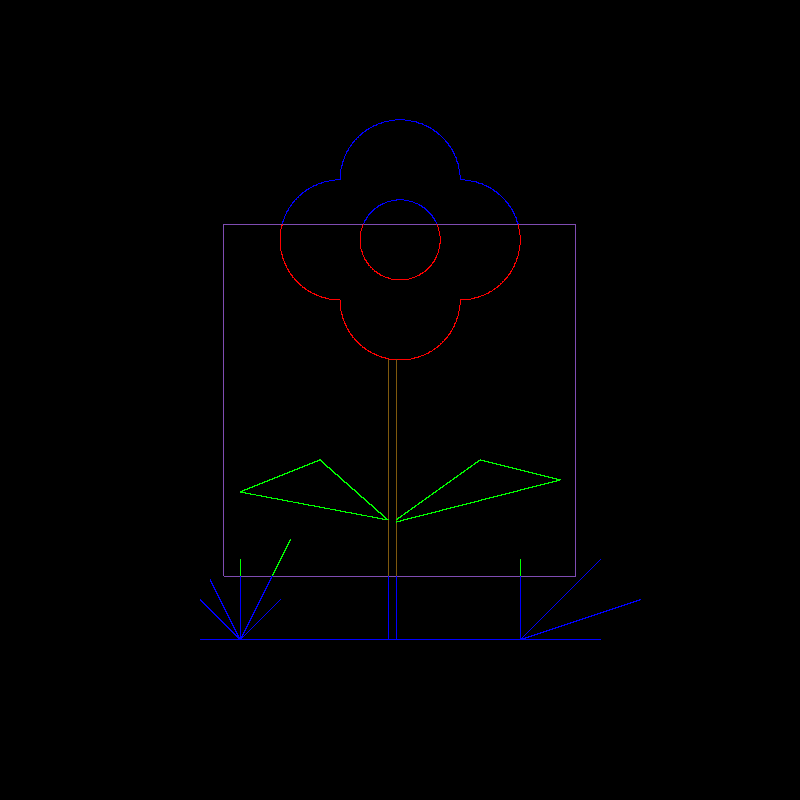

In [11]:
def findzone(x1,y1,x2,y2):
  Zone=0

  dx=x2-x1
  dy=y2-y1

  if abs(dx)<=abs(dy):
    if dx>0 and dy>0:
      Zone=1
    elif dx<0 and dy>0:
      Zone=2
    elif dx<0 and dy<0:
      Zone=5
    elif dx>0 and dy<0:
      Zone=6

  else:
    if dx>0 and dy>0:
      Zone=0
    elif dx<0 and dy>0:
      Zone=3
    elif dx<0 and dy<0:
      Zone=4
    elif dx>0 and dy<0:
      Zone=7

  return Zone



def convertzone0(x,y,temp):

  a,b=0,0
  if temp== 0:
    a,b=x,y
  elif temp== 1:
    a,b=y,x
  elif temp== 2:
    a,b=y,-x
  elif temp== 3:
    a,b=-x,y
  elif temp== 4:
    a,b=-x,-y
  elif temp== 5:
    a,b=-y,-x
  elif temp== 6:
    a,b=-y,x
  elif temp== 7:
    a,b=x,-y

  return a,b



def convert_to_original(x,y,temp):

  g,h=0,0

  if temp== 0:
    g,h=x,y
  elif temp== 1:
    g,h=y,x
  elif temp== 2:
    g,h=-y,x
  elif temp== 3:
    g,h=-x,y
  elif temp== 4:
    g,h=-x,-y
  elif temp== 5:
    g,h=-y,-x
  elif temp== 6:
    g,h=-y,x
  elif temp== 7:
    g,h=x,-y

  return g,h


def DrawLine(x1,y1,x2,y2):
  temp=findzone(x1,y1,x2,y2)
  
  p,q=convertzone0(x1,y1,temp)
  m,n=convertzone0(x2,y2,temp)
  
  dx = m-p
  dy = n-q

  d=2*dy-dx

  incE=2*dy
  incNE = 2 * (dy - dx)

  y = q
  x = p

  if dx==0:
    
    while y<=y2:
      c,d=convert_to_original(x,y,temp)
      CohenDraw(c,d,0.5, 0.35, 0.05)
      y+=0.0001

  while x<=x2:
    r,t=convert_to_original(x,y,temp)
    CohenDraw(r,t,0.5, 0.35, 0.05)

    if d>0:
      d+=incNE
      y+=0.0001
    else:
      d+=incE

    x+=0.0001


def Draw(x1,y1,x2,y2):
  temp=findzone(x1,y1,x2,y2)
  
  p,q=convertzone0(x1,y1,temp)
  m,n=convertzone0(x2,y2,temp)
  
  dx = m-p
  dy = n-q

  d=2*dy-dx

  incE=2*dy
  incNE = 2 * (dy - dx)

  y = q
  x = p

  if dx==0:
    
    while y<=y2:
      c,d=convert_to_original(x,y,temp)
      CohenDraw(c,d,0,1,0)
      y+=0.0001

  while x<=x2:
    r,t=convert_to_original(x,y,temp)
    CohenDraw(r,t,0,1,0)

    if d>0:
      d+=incNE
      y+=0.0001
    else:
      d+=incE

    x+=0.0001

DrawLine(-0.01,-0.6,-0.01,0.1)
DrawLine(-0.03,-0.6,-0.03,0.1)
DrawLine(-0.5,-0.6,0.5,-0.6)


Draw(-0.01,-0.3,0.2,-0.15)      # Right leaf
Draw(0.2,-0.15,0.4,-0.2)
Draw(0.4,-0.2,0.01,-0.3)


Draw(-0.4,-0.23,-0.03,-0.3)     # left leaf
Draw(-0.4,-0.23,-0.2,-0.15)
Draw(-0.2,-0.15,-0.03,-0.3)

Draw(-0.4,-0.6,-0.4,-0.4)      # left ghash
Draw(-0.4,-0.6,-0.5,-0.5)
Draw(-0.4,-0.6,-0.3,-0.5)
Draw(-0.4,-0.6,-0.35,-0.5)
Draw(-0.4,-0.6,-0.45,-0.5)


Draw(0.3,-0.6,0.3,-0.4)       # right ghash
Draw(0.3,-0.6,0.5,-0.4)
Draw(0.3,-0.6,0.6,-0.5)



img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)